# Displaying the Results

### Setup

In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
os.environ["JAX_PLATFORMS"] = "cpu"
plt.style.use('ggplot')
plt.rcParams.update({
    'axes.facecolor': '#f7f7f7',    # Set background color of the plot area to white
    'figure.facecolor': '#f7f7f7',  # Set background color of the figure to white
    'grid.color': 'lightgrey',     # Set grid line color to light grey
    'lines.linewidth': 1.0,
})

## Methods Comparison

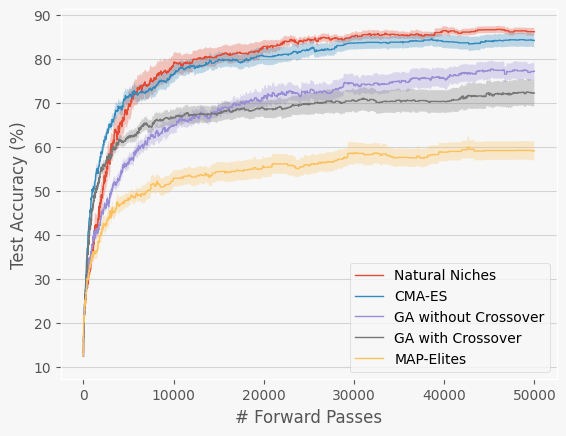

In [2]:
files = ["natural_niches", "cma_es", "ga_no_crossover", "ga", "map_elites"]
names = ["Natural Niches", "CMA-ES", "GA without Crossover", "GA with Crossover", "MAP-Elites"]

def plot(files, names):
    plt.figure()
    plt.grid(visible=False, axis="x")
    plt.ylabel("Test Accuracy (%)")
    plt.xlabel("# Forward Passes")

    for file, name in zip(files, names):
        file_path = os.path.join("results", f"{file}.pkl")
        if os.path.exists(file_path):        
            with open(file_path, "rb") as f:
                results = pickle.load(f)
            x = None
            y_list = []
            for r in results:
                if x is None:
                    x = r["evals"]
                else:
                    assert x == r["evals"], "All runs should have the same number of evaluations"
                y_list.append(r["test_values"])
                
            y_list = np.array(y_list) * 100
            y_mu = np.mean(y_list, axis=0)
            y_stderror = np.std(y_list, axis=0) / np.sqrt(len(y_list))
            plt.plot(x, y_mu, label=name)
            plt.fill_between(x, y_mu - y_stderror, y_mu + y_stderror, alpha=0.3)
        else:
            print(f"File {file_path} does not exist.")
    plt.legend(loc="best")
plot(files, names)

## Ablation Study

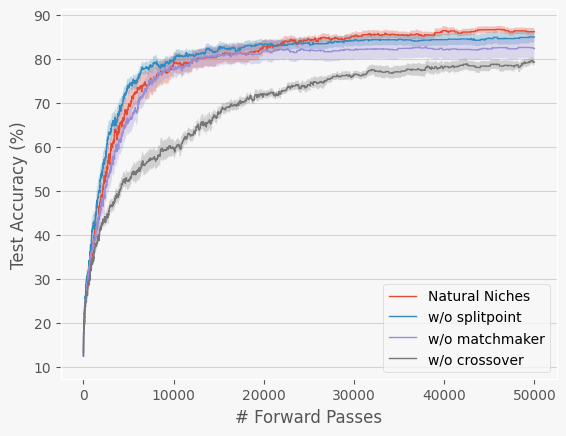

In [3]:
files = ["natural_niches", "natural_niches_no_splitpoint", "natural_niches_no_matchmaker", "natural_niches_no_crossover"]
names = ["Natural Niches", "w/o splitpoint", "w/o matchmaker", "w/o crossover"]
plot(files, names)